<a href="https://colab.research.google.com/github/Renee751/Advanced-Power-BI/blob/main/FINAL_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# CO2
url = 'https://github.com/owid/co2-data/raw/master/owid-co2-data.csv'
co2 = pd.read_csv(url)

# urbanization
urbanization_csv = "/content/drive/MyDrive/Colab Notebooks/urbanization-last-500-years.csv"
urbanization = pd.read_csv(urbanization_csv)

# schooling
schooling_csv = "/content/drive/MyDrive/Colab Notebooks/mean-years-of-schooling-long-run.csv"
schooling = pd.read_csv(schooling_csv)

# life-expectancy
life_expectancy_csv = "/content/drive/MyDrive/Colab Notebooks/life-expectancy.csv"
life_expectancy = pd.read_csv(life_expectancy_csv)

# military-expenditure-share-gdp
military_csv = "/content/drive/MyDrive/Colab Notebooks/military-expenditure-share-gdp.csv"
military = pd.read_csv(military_csv)



Mounted at /content/drive


# **1: Biggest predictor of CO2 output**
***What is the biggest predictor of a large CO2 output per capita of a country?***


Since there are lots of factors which may impact the CO2 output, this analysis focuses on 5 totally different topics.

1.    Energy sources *- impact of different sources on CO2 output*
2.    Urbanization - [high energy needs and lots of traffic] (https://www.oursustainablejourney.nl/blog/duurzame-stad-van-de-toekomst/:~:text=raakt%20ook%20steden.-,Klimaatverandering%20beperken%20en%20erop%20aanpassen,hoge%20energie%20behoefte%20en%20vervoer.)
3.    Schooling - *more education may result in better environmental care*
4.    Life-Expectancy -  [may impact CO2 output in a positive and negative way] (https://fbj.springeropen.com/articles/10.1186/s43093-022-00179-9)
5.    Military expenditures - [may have a positive impact on CO2 output]
 (https://www.jois.eu/?830,en_military-spending-and-co2-emissions-empirical-findings-from-countries-with-highest-per-capita-military-spending)

I did a correlation analyses to show the correlation of all different factors on CO2 output per capita. A positive perfect correlation is equal to 1, a strong negative correlation is equal to -1 and no relation at al is 0. The 3 strongest correlations are plotted in a scatterplot below.

**1. CLEANING DATASETS**

First step is to clean the dataset to be able to make reliable analyses.

In [3]:
co2
# co2.columns

# 'country', 'year','co2', 'population', 'gdp',
# 'cement_co2_per_capita',
# 'co2_per_capita', 'co2_per_gdp',
#  'coal_co2_per_capita',
#  'flaring_co2_per_capita',
# ,'gas_co2_per_capita',
#  'land_use_change_co2_per_capita',
#  'oil_co2_per_capita', 'other_co2_per_capita',

co2_clean = co2.drop(columns=['consumption_co2','cement_co2','coal_co2','flaring_co2','gas_co2','land_use_change_co2','oil_co2','other_co2_per_capita', 'other_industry_co2', 'primary_energy_consumption','energy_per_capita',
          'ghg_excluding_lucf_per_capita', 'ghg_per_capita','methane','methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita','co2_growth_abs',
          'co2_growth_prct','co2_including_luc', 'co2_including_luc_growth_abs','co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
          'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy','co2_per_unit_energy', 'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
          'cumulative_co2_including_luc', 'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
          'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_gdp', 'share_global_cement_co2', 'share_global_co2',
          'share_global_co2_including_luc', 'share_global_coal_co2','share_global_cumulative_cement_co2', 'share_global_cumulative_co2',
          'share_global_cumulative_co2_including_luc', 'share_global_cumulative_coal_co2', 'share_global_cumulative_flaring_co2',
          'share_global_cumulative_gas_co2', 'share_global_cumulative_luc_co2','share_global_cumulative_oil_co2', 'share_global_cumulative_other_co2',
          'share_global_flaring_co2', 'share_global_gas_co2','share_global_luc_co2', 'share_global_oil_co2','share_global_other_co2', 'share_of_temperature_change_from_ghg',
          'temperature_change_from_ch4', 'temperature_change_from_co2','temperature_change_from_ghg', 'temperature_change_from_n2o',
          'total_ghg', 'total_ghg_excluding_lucf', 'trade_co2','trade_co2_share'])

# Clearning dataset co2.
co2_clean2= co2_clean[co2_clean['year']>=1950] # data after 1950s
co2_clean2= co2_clean2.dropna(subset=['iso_code']) # Only countries
co2_clean2.columns = ['country', 'year', 'code', 'population', 'gdp',
       'cement_co2_per_capita', 'co2', 'co2_per_capita', 'co2_per_gdp',
       'coal_co2_per_capita', 'consumption_co2_per_capita',
       'flaring_co2_per_capita', 'gas_co2_per_capita',
       'land_use_change_co2_per_capita', 'oil_co2_per_capita']

In [4]:
# Clearning dataset urbanization.
urbanization= urbanization.dropna(subset=['Code']) # Only countries
urbanization= urbanization[urbanization['Year']>=1950] # data after 1950s
urbanization.columns = ['entity', 'code', 'year','urban_population_%'] # rename headers


In [ ]:
# Clearning dataset schooling.
schooling= schooling.dropna(subset=['Code']) # Only countries
schooling= schooling[schooling['Year']>=1950] # data after 1950s
schooling.columns = ['entity', 'code', 'year','avg_years_schooling'] # rename headers
schooling

In [ ]:
# Clearning dataset life_expectancy.
life_expectancy= life_expectancy.dropna(subset=['Code']) # Only countries
life_expectancy= life_expectancy[life_expectancy['Year']>=1950] # data after 1950s
life_expectancy.columns = ['entity', 'code', 'year','life_expectancy']
life_expectancy

**2. MERGING DATASETS**

After cleaning the dataset the different sources are merged. After marging the impact analyses is made in step 3.

In [ ]:
# Merge dataframes - based on year and code.
co2_df = co2_clean2.merge(urbanization, on=['year', 'code']).merge(schooling, on=['year', 'code']).merge(life_expectancy, on=['year', 'code'])
co2_df2 =co2_df.drop(columns=['entity_x', 'entity_y','entity'])
co2_df2

In [8]:
co2_df2.drop(2784, inplace= True)
# Outliers
# Kuwait 1991 extreme results - remove row (index 2784)

**3. IMPACT ON CO2 (per parameter)**

The impact of all different factors on CO2 output are analysed using the correlation. Correlation shows the interdependence of 2 factors.



In [9]:
columns_to_analyze = ['co2_per_capita','population', 'gdp', 'co2','cement_co2_per_capita','coal_co2_per_capita','consumption_co2_per_capita', 'flaring_co2_per_capita','gas_co2_per_capita', 'land_use_change_co2_per_capita','oil_co2_per_capita', 'urban_population_%', 'avg_years_schooling','life_expectancy']
correlation = co2_df2[columns_to_analyze].corr()
correlation

# CORRELATION (perfect correlation is 1, correlation results close to 1 seem to have effect on each other)
#       Oil has a correlation of 0.74 with co2 per capita
#       Gas has a correlation of 0.84 with co2 per capita
#       Consumption_co2 has a correlation of 0.88 with co2 per capita

# Top 3 correlation scores are plotted in a scatterplot to make the correlation visible


,co2_per_capita,population,gdp,co2,cement_co2_per_capita,coal_co2_per_capita,consumption_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,land_use_change_co2_per_capita,oil_co2_per_capita,urban_population_%,avg_years_schooling,life_expectancy
co2_per_capita,1.000000,-0.016862,0.185392,0.186704,0.577405,0.423249,0.879663,0.393730,0.778562,-0.167638,0.737617,0.556088,0.417733,0.440015
population,-0.016862,1.000000,0.626964,0.670904,0.045433,0.084733,-0.083224,-0.018630,-0.031122,-0.045253,-0.059213,-0.055805,-0.017506,0.035124
gdp,0.185392,0.626964,1.000000,0.939840,0.130984,0.255014,0.173699,-0.012998,0.057877,-0.061023,0.174142,0.158583,0.227509,0.215547
co2,0.186704,0.670904,0.939840,1.000000,0.148809,0.281811,0.147120,-0.008351,0.061375,-0.059203,0.144713,0.123785,0.172528,0.155896
cement_co2_per_capita,0.577405,0.045433,0.130984,0.148809,1.000000,0.280894,0.563618,0.040893,0.417037,-0.197304,0.540988,0.464002,0.380703,0.475311
coal_co2_per_capita,0.423249,0.084733,0.255014,0.281811,0.280894,1.000000,0.379862,-0.022792,0.016766,-0.132929,0.209917,0.296847,0.372301,0.268469
consumption_co2_per_capita,0.879663,-0.083224,0.173699,0.147120,0.563618,0.379862,1.000000,0.281001,0.642682,-0.221975,0.820885,0.670070,0.506974,0.566905
flaring_co2_per_capita,0.393730,-0.018630,-0.012998,-0.008351,0.040893,-0.022792,0.281001,1.000000,0.124803,-0.003736,0.071240,0.082917,-0.036313,0.001006
gas_co2_per_capita,0.778562,-0.031122,0.057877,0.061375,0.417037,0.016766,0.642682,0.124803,1.000000,-0.099494,0.423121,0.326300,0.206391,0.238819
land_use_change_co2_per_capita,-0.167638,-0.045253,-0.061023,-0.059203,-0.197304,-0.132929,-0.221975,-0.003736,-0.099494,1.000000,-0.163904,-0.193132,-0.271959,-0.296161


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


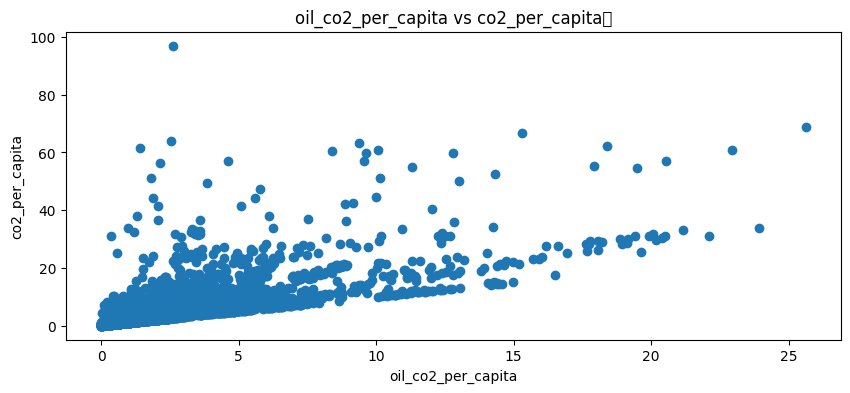

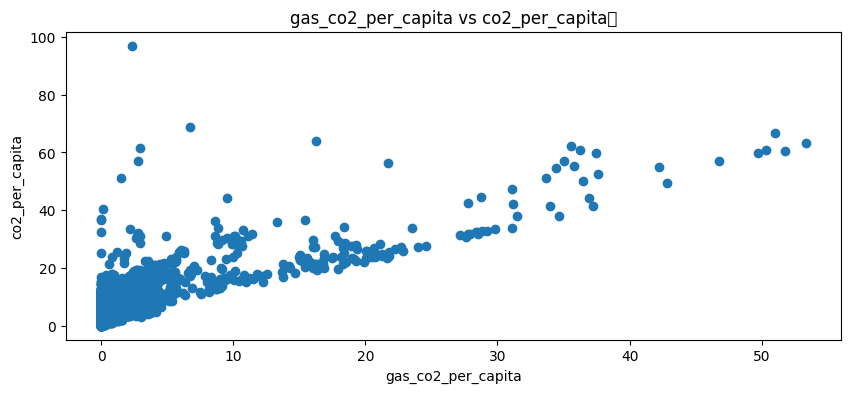

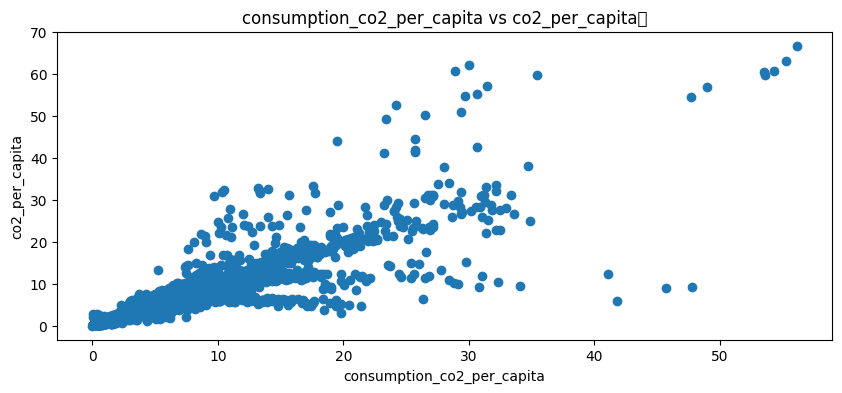

In [10]:
# PLOT OIL and CO2
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.scatter(co2_df2['oil_co2_per_capita'], co2_df2['co2_per_capita'])
plt.xlabel('oil_co2_per_capita')
plt.ylabel('co2_per_capita')
plt.title('oil_co2_per_capita vs co2_per_capita	')
plt.show()

# PLOT GAS and CO2
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.scatter(co2_df2['gas_co2_per_capita'], co2_df2['co2_per_capita'])
plt.xlabel('gas_co2_per_capita')
plt.ylabel('co2_per_capita')
plt.title('gas_co2_per_capita vs co2_per_capita	')
plt.show()

# PLOT CONSUMPTION and CO2
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.scatter(co2_df2['consumption_co2_per_capita'], co2_df2['co2_per_capita'])
plt.xlabel('consumption_co2_per_capita')
plt.ylabel('co2_per_capita')
plt.title('consumption_co2_per_capita vs co2_per_capita	')
plt.show()

**Results**: According to the analyses consumption CO2 has the biggest impact on the CO2 output per capita. Next to the consumption CO2 Oil and Gas are energy sources with the biggest impact on CO2.


**Discussion**: This analyses only shows 5 factors which gives a good first impression, but isn't comprehensive enough to draw major conclusions. Furter analyses should be focussingon on consumption CO2 - among others to analyse what  the biggest factorsare  in concumption CO2? Next to this, I would suggest dive deeper into the comparison with fossil energy and renewable energy - the optimal combination for this moment in fossil en renewable energy in costs, CO2 output (reduction) and predictions for the future, investing in the best renewable source.

### **2: Biggest strides in decreasing CO2 output**

*Which countries are making the biggest strides in decreasing CO2 output?*

The general CO2 report shows the CO2 output, per country per year. The relative change between the first (1950) and the last datapoint (2016) are calculated, and a top 5 countries in biggest strides in decreasing CO2 ouput are showed in a table.



In [11]:
# To be able to compare countries, CO2 output per capita is used for this analysis.

# Sorting and grouping the data
co2_df2_sorted = co2_df2.sort_values(by=['country', 'year'])
co2_df2_grouped = co2_df2_sorted.groupby('country').agg({'co2_per_capita': lambda x: ((x.iloc[-1] - x.iloc[0]) /x.iloc[0]) *100 }) # (lambda to calculate the relative change)

# Sorting the biggest relative (reduction) in co2 per capita
co2_df2_top_countries = co2_df2_grouped.sort_values(by='co2_per_capita', ascending=True).head(5)

print(co2_df2_top_countries)

                              co2_per_capita
country                                     
Democratic Republic of Congo      -79.166667
Zambia                            -65.273632
Tajikistan                        -49.033149
Moldova                           -48.457104
North Macedonia                   -43.747876


<ipython-input-11-a72fe393f63c>:5: RuntimeWarning: divide by zero encountered in double_scalars
  co2_df2_grouped = co2_df2_sorted.groupby('country').agg({'co2_per_capita': lambda x: ((x.iloc[-1] - x.iloc[0]) /x.iloc[0]) *100 }) # (lambda to calculate the relative change)


**Results**: To analyse the biggest strices in decreasing CO2 output the CO2 per capita is used. Using CO2 per capita takes into account the changes in CO2 output due to population changes. The relative change per country is calculated over the fist and last datapoint available.
According to this analysis the Democratic Republic of Congo made, with 79%, the biggest strice in decreasing CO2 output, followed by Zambia with 65%.


**Discussion**: This analysis is based on the difference between 1950 - 2016, to draw further conclusions I would suggest to investigate more datapoints in the timeline. Besides, it could be interesting to cluster and analyse the countries based on their GDP (since there is a high correlation between GDP and CO2).

### **3: Best future price for non-fossil fuel energy**

*Which non-fossil fuel energy technology will have the best price in the future?*
The dataset of 'levelized cost of energy' gives a overview of the costs per non-fossil fuel energy. I fit a linear regression model to predict (world) price that included the different non-fossil fuel energies and the costs per source over the past years.
Based on the dta availability, this analyses takes the data from 2010 onwards into account.

In [15]:
# levelized costs of energy
# The table below shows the different costs per energy source over the years.
costs_energy_csv = "/content/drive/MyDrive/Colab Notebooks/levelized-cost-of-energy.csv"
costs_energy = pd.read_csv(costs_energy_csv)

df = costs_energy.loc[costs_energy['Entity']== 'World']
df2 = df.drop(columns=['Entity', 'Code'])
df3 = df2.set_index('Year')
df3.head(12)


,Bioenergy levelized cost of energy,Geothermal levelized cost of energy,Offshore wind levelized cost of energy,Solar photovoltaic levelized cost of energy,Concentrated solar power levelized cost of energy,Hydropower levelized cost of energy,Onshore wind levelized cost of energy
Year,,,,,,,
2010,0.078189,0.050445,0.187857,0.417149,0.358004,0.038883,0.102061
2011,0.056684,NaN,0.197549,0.311298,0.346655,0.036561,0.096487
2012,0.061879,0.085695,0.166601,0.232633,0.337574,0.038038,0.088390
2013,0.082198,0.064111,0.166662,0.179401,0.248888,0.042512,0.089206
2014,0.082375,0.065335,0.172199,0.161258,0.216377,0.042457,0.080203
2015,0.072771,0.058849,0.140527,0.121080,0.223889,0.036572,0.068962
2016,0.071178,0.067802,0.116323,0.106340,0.247269,0.048389,0.063855
2017,0.071070,0.070917,0.106152,0.083660,0.206213,0.050722,0.059959
2018,0.055360,0.067583,0.100049,0.071139,0.149103,0.039837,0.050880


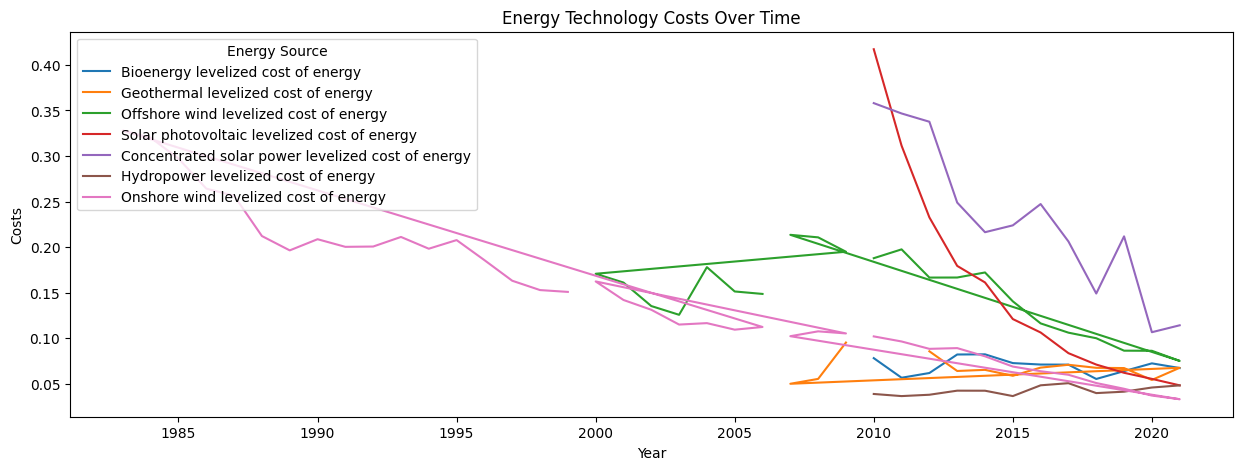

In [ ]:
# Below a visible representation of the data above. The cost of the different energy sources over the years.

import matplotlib.pyplot as plt
df3.plot(kind='line', figsize=(15, 5))

# Add labels, legend, title
plt.xlabel('Year')
plt.ylabel('Costs')
plt.title('Energy Technology Costs Over Time')
plt.legend(title='Energy Source',loc='upper left')

plt.show()

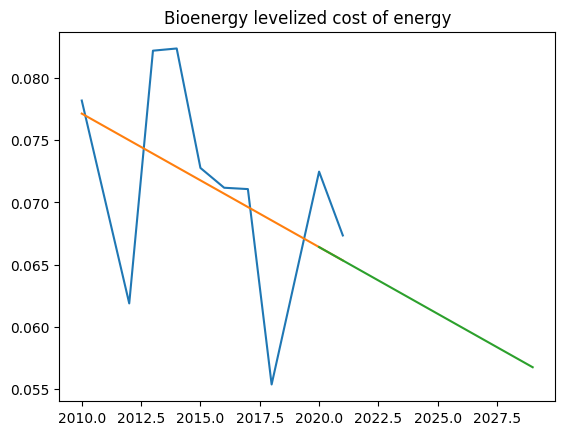

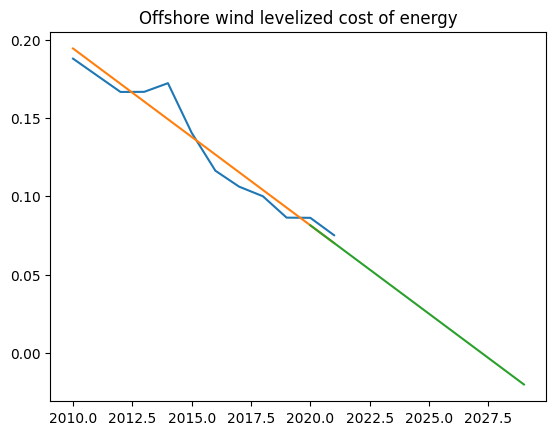

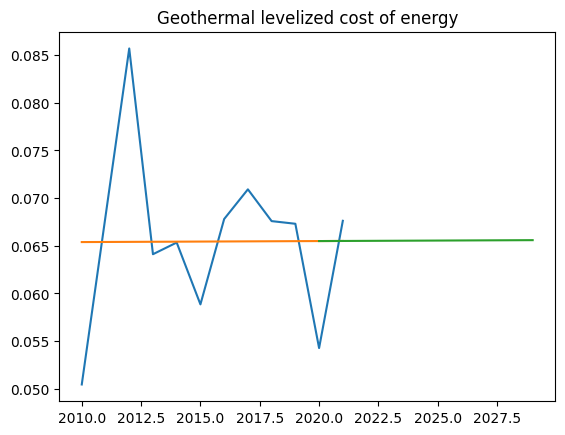

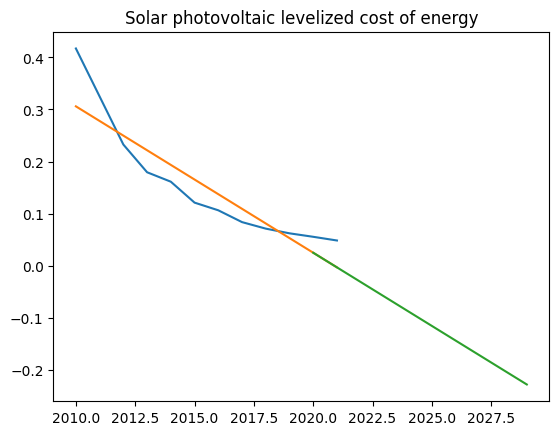

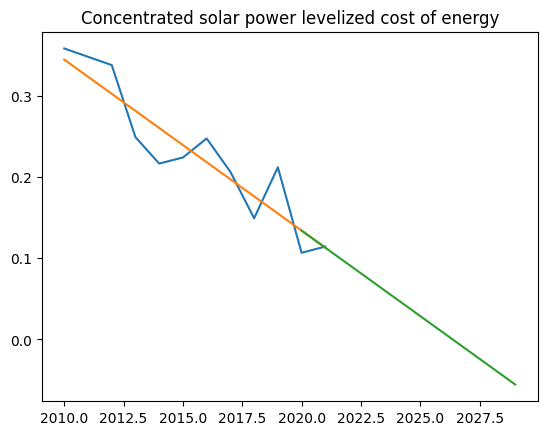

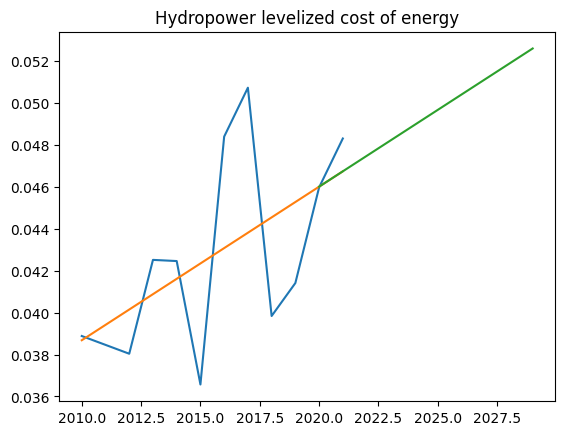

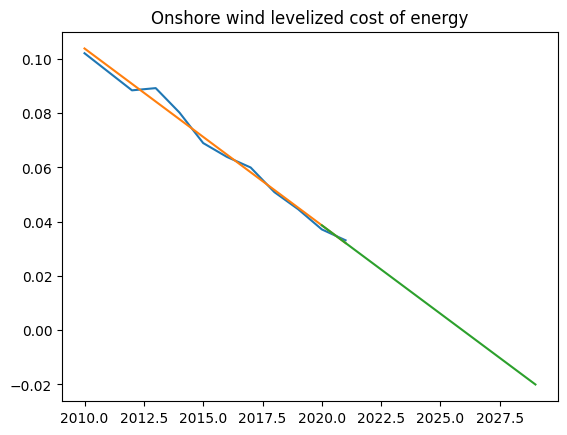

In [ ]:
# Lineair regression analysis of the costs per energy source.
# The costs as showed above, and the predicted costs, based on the linear regression model till 2030.

##########################################################
# Filter out rows with NaN values
df4 = df3.dropna(subset=['Bioenergy levelized cost of energy',
       'Geothermal levelized cost of energy',
       'Offshore wind levelized cost of energy',
       'Solar photovoltaic levelized cost of energy',
       'Concentrated solar power levelized cost of energy',
       'Hydropower levelized cost of energy',
       'Onshore wind levelized cost of energy'])

# NumPy regression
x_values = df4.index
y_values = df4['Bioenergy levelized cost of energy']
slope, intercept = np.polyfit(x_values, y_values, 1)
regression_line = slope * x_values + intercept

# Plot line chart for energy source with the corresponding average prices
plt.plot(x_values, y_values)
plt.plot(x_values, regression_line)

# Predict value for future timerange untill year 2030
additional_years = range(2020, 2030)
predicted_values = slope * additional_years + intercept
plt.plot(additional_years, predicted_values)

# Show the plot
plt.title('Bioenergy levelized cost of energy')
plt.show()

##########################################################
# NumPy regression
x_values = df4.index
y_values = df4['Offshore wind levelized cost of energy']
slope, intercept = np.polyfit(x_values, y_values, 1)
regression_line = slope * x_values + intercept

# Plot line chart for energy source with the corresponding average prices
plt.plot(x_values, y_values)
plt.plot(x_values, regression_line)

# Predict value for future timerange untill year 2030
additional_years = range(2020, 2030)
predicted_values = slope * additional_years + intercept
plt.plot(additional_years, predicted_values)

# Show the plot
plt.title('Offshore wind levelized cost of energy')
plt.show()

##########################################################
# NumPy regression
x_values = df4.index
y_values = df4['Geothermal levelized cost of energy']
slope, intercept = np.polyfit(x_values, y_values, 1)
regression_line = slope * x_values + intercept

# Plot line chart for energy source with the corresponding average prices
plt.plot(x_values, y_values)
plt.plot(x_values, regression_line)

# Predict value for future timerange untill year 2030
additional_years = range(2020, 2030)
predicted_values = slope * additional_years + intercept
plt.plot(additional_years, predicted_values)

# Show the plot
plt.title('Geothermal levelized cost of energy')
plt.show()

##########################################################
# NumPy regression
x_values = df4.index
y_values = df4['Solar photovoltaic levelized cost of energy']
slope, intercept = np.polyfit(x_values, y_values, 1)
regression_line = slope * x_values + intercept

# Plot line chart for energy source with the corresponding average prices
plt.plot(x_values, y_values)
plt.plot(x_values, regression_line)

# Predict value for future timerange untill year 2030
additional_years = range(2020, 2030)
predicted_values = slope * additional_years + intercept
plt.plot(additional_years, predicted_values)

# Show the plot
plt.title('Solar photovoltaic levelized cost of energy')
plt.show()

##########################################################
# NumPy regression
x_values = df4.index
y_values = df4['Concentrated solar power levelized cost of energy']
slope, intercept = np.polyfit(x_values, y_values, 1)
regression_line = slope * x_values + intercept

# Plot line chart for energy source with the corresponding average prices
plt.plot(x_values, y_values)
plt.plot(x_values, regression_line)

# Predict value for future timerange untill year 2030
additional_years = range(2020, 2030)
predicted_values = slope * additional_years + intercept
plt.plot(additional_years, predicted_values)

# Show the plot
plt.title('Concentrated solar power levelized cost of energy')
plt.show()

##########################################################
# NumPy regression
x_values = df4.index
y_values = df4['Hydropower levelized cost of energy']
slope, intercept = np.polyfit(x_values, y_values, 1)
regression_line = slope * x_values + intercept

# Plot line chart for energy source with the corresponding average prices
plt.plot(x_values, y_values)
plt.plot(x_values, regression_line)

# Predict value for future timerange untill year 2030
additional_years = range(2020, 2030)
predicted_values = slope * additional_years + intercept
plt.plot(additional_years, predicted_values)

# Show the plot
plt.title('Hydropower levelized cost of energy')
plt.show()

##########################################################
# NumPy regression
x_values = df4.index
y_values = df4['Onshore wind levelized cost of energy']
slope, intercept = np.polyfit(x_values, y_values, 1)
regression_line = slope * x_values + intercept

# Plot line chart for energy source with the corresponding average prices
plt.plot(x_values, y_values)
plt.plot(x_values, regression_line)

# Predict value for future timerange untill year 2030
additional_years = range(2020, 2030)
predicted_values = slope * additional_years + intercept
plt.plot(additional_years, predicted_values)

# Show the plot
plt.title('Onshore wind levelized cost of energy')
plt.show()

**Results**: The lineair regression analysis of the costs per energy source shows visible differences in costs between the sources. The graphs above show the costs and the predicted costs based on the linear regression analyses till 2030.
Both, solar photovoltaic and onshore wind energy sources have the best price in the future.

**Discussion**: Next to solar photovoltaic and onshore wind energy is is also interesting to keep an eye on the costs of concentrated solar power levelized cost of energy.
